# Intensive Care in Germany

## Data Source

[DIVI-Intensivregister](https://www.intensivregister.de/) monitors the ICU capacities of 1,300 hospitals in Germany.

## Setup

In [33]:
# standard library
import datetime
import math

In [34]:
# third party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

## Date this Notebook was run

In [35]:
today = datetime.datetime.today().strftime('%Y-%m-%d')
today

'2021-05-19'

In [36]:
# style like ggplot in R
plt.style.use('ggplot')

In [37]:
# Avoid cutting off part of the axis labels, see:
# https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
plt.rcParams.update({'figure.autolayout': True})

## Get Data

In [38]:
timeline_data = "https://diviexchange.blob.core.windows.net/%24web/bundesland-zeitreihe.csv"

In [39]:
timeline_df = pd.read_csv(timeline_data)

In [40]:
timeline_df.tail(3)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
7239,2021-05-19T12:15:00+02:00,BRANDENBURG,50,67,538,135,323,104,57,22,7,14,7
7240,2021-05-19T12:15:00+02:00,NORDRHEIN_WESTFALEN,320,808,4978,653,2362,520,271,101,79,120,20
7241,2021-05-19T12:15:00+02:00,DEUTSCHLAND,1330,3694,20529,2952,10106,2677,1278,429,278,489,134


## Rename Columns

### Convert datatype of date column

In [41]:
timeline_df["Datum"] = timeline_df["Datum"].str[:10]
timeline_df.head()

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
0,2020-03-20,BAYERN,45,61,77,392,0,0,0,37,5,1,2
1,2020-03-20,RHEINLAND_PFALZ,15,14,48,112,0,0,0,10,3,2,0
2,2020-03-20,NIEDERSACHSEN,25,17,43,236,0,0,0,20,3,2,0
3,2020-03-20,SACHSEN,20,3,44,272,0,0,0,16,2,2,0
4,2020-03-20,HESSEN,19,7,18,185,0,0,0,16,3,0,0


In [42]:
timeline_df.iloc[ : , [0]] = timeline_df.iloc[ : , [0]].apply(pd.to_datetime)

In [43]:
timeline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7242 entries, 0 to 7241
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Datum                                       7242 non-null   datetime64[ns]
 1   Bundesland                                  7242 non-null   object        
 2   Anzahl_Meldebereiche_Erwachsene             7242 non-null   int64         
 3   Aktuelle_COVID_Faelle_Erwachsene_ITS        7242 non-null   int64         
 4   Belegte_Intensivbetten_Erwachsene           7242 non-null   int64         
 5   Freie_Intensivbetten_Erwachsene             7242 non-null   int64         
 6   7_Tage_Notfallreserve_Erwachsene            7242 non-null   int64         
 7   Freie_IV_Kapazitaeten_Gesamt                7242 non-null   int64         
 8   Freie_IV_Kapazitaeten_Davon_COVID           7242 non-null   int64         
 9   Betriebs

In [44]:
federal_level = timeline_df[timeline_df.Bundesland=='DEUTSCHLAND']
federal_level.tail(3)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
7207,2021-05-17,DEUTSCHLAND,1332,4002,20008,3410,10174,2876,1312,425,271,503,133
7224,2021-05-18,DEUTSCHLAND,1333,3864,20449,3049,10149,2643,1266,413,286,499,135
7241,2021-05-19,DEUTSCHLAND,1330,3694,20529,2952,10106,2677,1278,429,278,489,134


## Used Beds (Adults)

In [45]:
used_beds = federal_level.loc[ : , ['Datum', 'Belegte_Intensivbetten_Erwachsene']]
used_beds.columns = ['date', 'ICU beds in use (adults)']
used_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 16 to 7241
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      426 non-null    datetime64[ns]
 1   ICU beds in use (adults)  426 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.0 KB


In [46]:
used_beds.set_index('date', inplace=True)

<AxesSubplot:xlabel='date'>

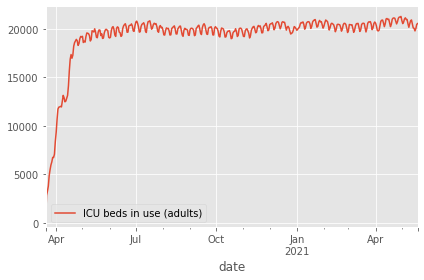

In [47]:
used_beds.plot()

## Covid-19 patients in ICU

In [48]:
icu = federal_level.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]

In [49]:
icu.columns = ['date', 'Covid-19 cases in ICU']
icu.set_index('date', inplace=True)
icu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 426 entries, 2020-03-20 to 2021-05-19
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  426 non-null    int64
dtypes: int64(1)
memory usage: 6.7 KB


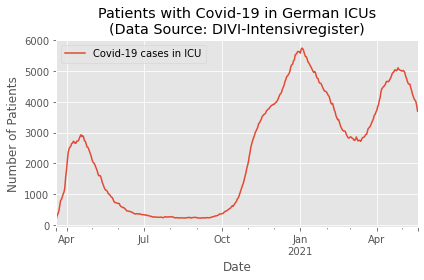

In [50]:
icu_cases = icu.plot(
    title='Patients with Covid-19 in German ICUs\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')

In [51]:
fig = icu_cases.get_figure()
fig.savefig('img/covid-19-patients-in-icu-germany.png')

### Situation in North Rhine-Westphalia

NRW ist the state in Germany with the highest number of inhabitants.

In [52]:
nrw = timeline_df[timeline_df.Bundesland=='NORDRHEIN_WESTFALEN']
nrw.tail(2)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
7223,2021-05-18,NORDRHEIN_WESTFALEN,320,834,5000,655,2356,499,269,90,79,129,22
7240,2021-05-19,NORDRHEIN_WESTFALEN,320,808,4978,653,2362,520,271,101,79,120,20


In [53]:
icu_nrw = nrw.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]
icu_nrw.columns = ['date', 'Covid-19 cases in ICU']
icu_nrw.set_index('date', inplace=True)
icu_nrw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 426 entries, 2020-03-20 to 2021-05-19
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  426 non-null    int64
dtypes: int64(1)
memory usage: 6.7 KB


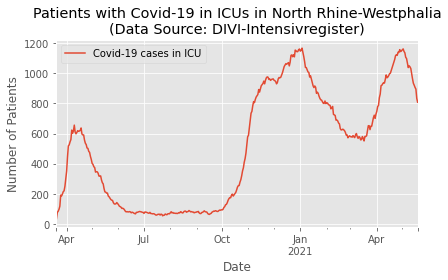

In [54]:
icu_cases_nrw = icu_nrw.plot(
    title='Patients with Covid-19 in ICUs in North Rhine-Westphalia\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')

### Situation in Rhineland-Palatinate

In [55]:
rlp = timeline_df[timeline_df.Bundesland=='RHEINLAND_PFALZ']
rlp.tail(2)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
7208,2021-05-18,RHEINLAND_PFALZ,77,141,850,209,436,182,85,28,19,25,5
7225,2021-05-19,RHEINLAND_PFALZ,77,138,851,212,431,178,78,25,20,27,5


In [56]:
icu_rlp = rlp.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]
icu_rlp.columns = ['date', 'Covid-19 cases in ICU']
icu_rlp.set_index('date', inplace=True)
icu_rlp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 426 entries, 2020-03-20 to 2021-05-19
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  426 non-null    int64
dtypes: int64(1)
memory usage: 6.7 KB


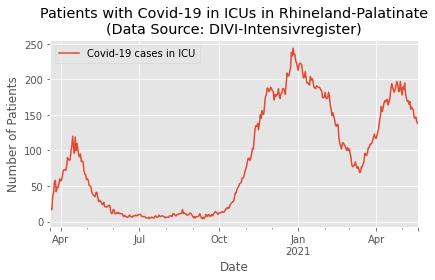

In [57]:
icu_cases_rlp = icu_rlp.plot(
    title='Patients with Covid-19 in ICUs in Rhineland-Palatinate\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')

### Situation in Saxony

Saxonia had high case numbers during the pandemic.

In [58]:
saxonia = timeline_df[timeline_df.Bundesland=='SACHSEN']
saxonia.tail(2)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
7211,2021-05-18,SACHSEN,79,339,1313,161,615,187,57,26,18,26,9
7229,2021-05-19,SACHSEN,79,330,1307,162,619,204,63,27,16,27,9


In [59]:
icu_saxonia = saxonia.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]
icu_saxonia.columns = ['date', 'Covid-19 cases in ICU']
icu_saxonia.set_index('date', inplace=True)
icu_saxonia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 426 entries, 2020-03-20 to 2021-05-19
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  426 non-null    int64
dtypes: int64(1)
memory usage: 6.7 KB


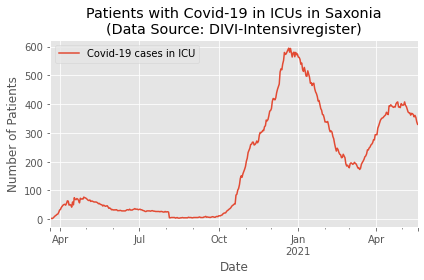

In [60]:
icu_cases_saxonia = icu_saxonia.plot(
    title='Patients with Covid-19 in ICUs in Saxonia\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')